In [17]:
from glob import glob
import pickle

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
file_list = glob('data_export/main_no_box/*')

In [22]:
file_list

['data_export/main_no_box/res2.pickle',
 'data_export/main_no_box/res6.pickle',
 'data_export/main_no_box/res4.pickle',
 'data_export/main_no_box/res8.pickle',
 'data_export/main_no_box/res3.pickle',
 'data_export/main_no_box/res7.pickle',
 'data_export/main_no_box/res5.pickle']

In [23]:
all_dicts = []
for filename in file_list:
    with open(filename, 'rb') as handle:
        
        this_dict = pickle.load(handle)
        all_dicts.append(this_dict)




In [25]:
summed_dict = {}

for dic in all_dicts:
    for modeltype, resdict in dic.items():
        if modeltype not in summed_dict:
            summed_dict[modeltype] = {}
        for dim, res in resdict.items():
            if dim not in summed_dict[modeltype]:
                summed_dict[modeltype][dim] = []
            summed_dict[modeltype][dim].append(res)
            

In [27]:
summed_dict

{'S': {0.001: [2, 2, 1],
  0.005: [2, 1.4, 1.0, 1, 1.0, 2],
  0.01: [2, 1.0, 1, 2.6, 1, 2.4, 2],
  0.02: [10, 1.0, 6, 2.8, 10, 1.1, 1],
  0.05: [17, 9.1, 100, 3.1, 40, 54.4, 6],
  0.1: [14, 81.0, 100, 91.4, 100, 43.8, 100],
  0.15: [38, 100, 100],
  0.2: [42, 100],
  0.015: [1.0, 1.0, 1.0, 1],
  0.025: [1.1, 1.5, 1.3, 20],
  0.03: [2.2, 1.9, 1.1, 100],
  0.035: [3.5, 1.0, 4.7, 2],
  0.04: [4.6, 4.6, 5.4, 100],
  0.045: [14.2, 2.0, 2.0, 100],
  0.055: [7.1, 1.0, 10.2, 100],
  0.06: [6.2, 2.6, 24.8, 100],
  0.065: [29.2, 9.4, 20.0, 100],
  0.07: [20.6, 46.3, 27.4, 100],
  0.075: [82.1, 73.0, 15.0, 100],
  0.08: [26.9, 56.8, 43.2, 100],
  0.085: [51.6, 73.4, 81.2, 100],
  0.09: [43.6, 63.4, 73.8, 100],
  0.002: [4],
  0.004: [2],
  0.006: [1],
  0.3: [100],
  0.5: [100]},
 'M': {0.001: [2, 1, 10],
  0.005: [2, 1.1, 1.1, 1, 1.2, 1],
  0.01: [3, 1.1, 1, 1.1, 1, 1.2, 1],
  0.02: [2, 1.6, 2, 2.0, 1, 1.0, 40],
  0.05: [26, 1.7, 1, 3.4, 5, 3.3, 100],
  0.1: [34, 4.4, 100, 46.2, 100, 6.6, 100],


In [29]:
def sort_dict(d):
    return dict(sorted(d.items()))

In [31]:
sort_dict(summed_dict['XS'])

{0.005: [1.9, 2.0],
 0.01: [1.8, 3.2],
 0.015: [1.5, 1.4],
 0.02: [3.2, 4.2],
 0.025: [1.7, 2.4],
 0.03: [2.2, 6.3],
 0.035: [2.3, 1.0],
 0.04: [7.2, 3.6],
 0.045: [3.1, 6.7],
 0.05: [5.4, 7.4],
 0.055: [7.6, 7.8],
 0.06: [39.5, 23.1],
 0.065: [1.0, 20.6],
 0.07: [29.2, 14.5],
 0.075: [38.2, 9.8],
 0.08: [22.6, 21.7],
 0.085: [46.8, 39.0],
 0.09: [35.8, 50.9],
 0.1: [42.4, 56.2]}

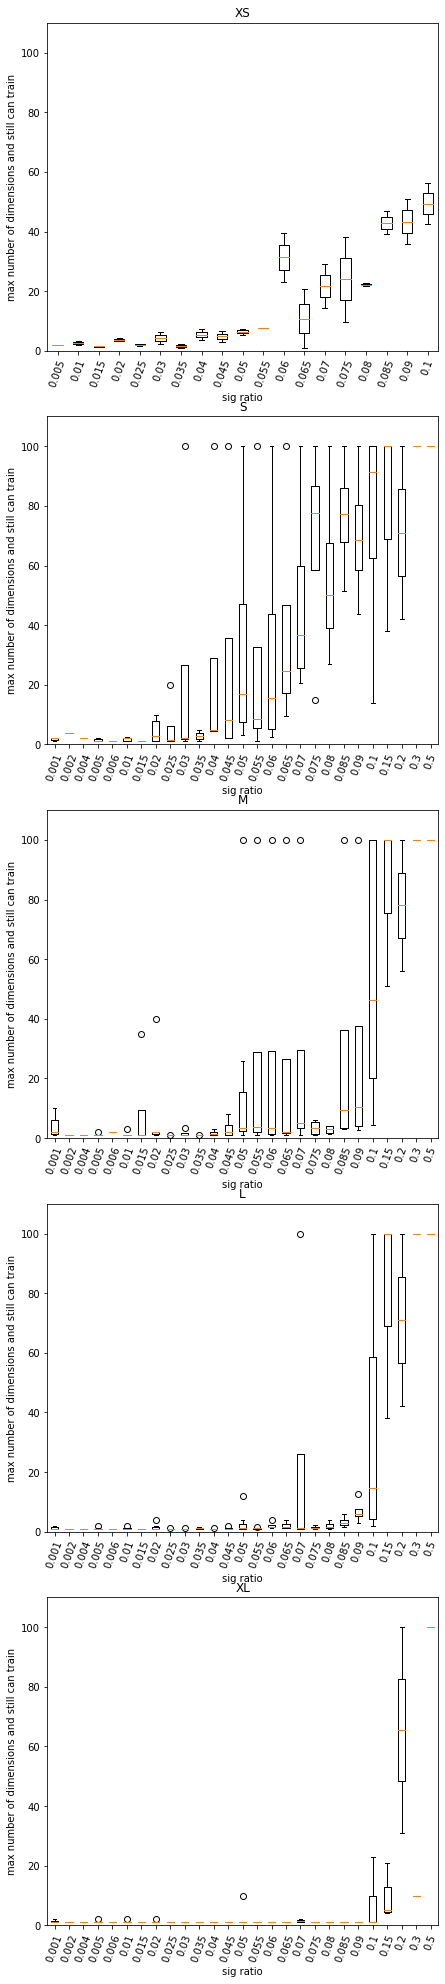

In [38]:
fig, axs = plt.subplots(5, 1, figsize=(7,35))
names = ['XS','S','M','L','XL']


    
 
for i, name in enumerate(names):
    data = []
    labels = []
    dic = summed_dict[name]
    dic = sort_dict(dic)
    
    for x, y in dic.items():
        data.append(y)
        labels.append(x)
    axs[i].boxplot(data)
    axs[i].set_xticklabels(labels)
    axs[i].set_title(name)
    axs[i].set_xlabel('sig ratio')
    axs[i].set_ylabel('max number of dimensions and still can train')
    axs[i].xaxis.set_tick_params(rotation=70)
    axs[i].set_ylim([0, 110])
      
 
     
# show plot
plt.show()

In [7]:
numbers_S = make_dict('S')

In [8]:
numbers_M = make_dict('M')
numbers_L = make_dict('L')
numbers_XS = make_dict('X')

In [9]:
def sort_dict(d):
    return dict(sorted(d.items()))

In [10]:
numbers_S = sort_dict(numbers_S)
numbers_M = sort_dict(numbers_M)
numbers_L = sort_dict(numbers_L)
numbers_XS = sort_dict(numbers_XS)

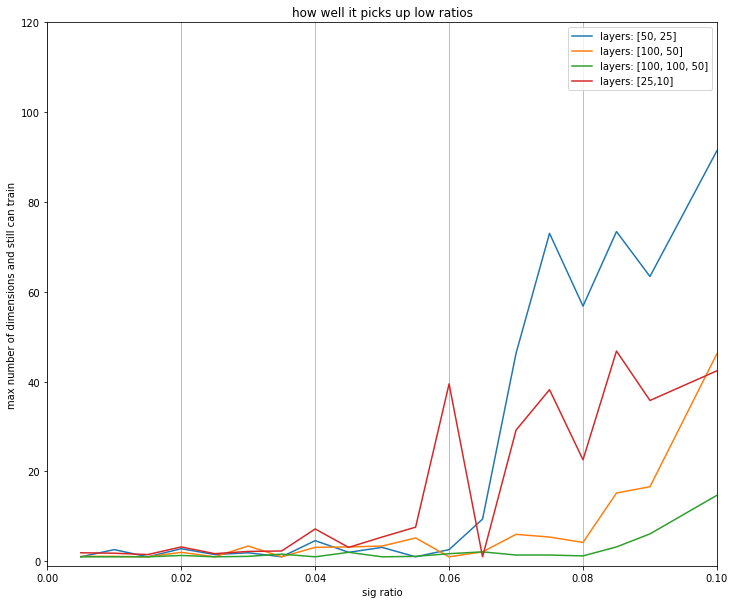

In [11]:
    
fig, ax = plt.subplots(figsize = (12,10))

ax.plot(numbers_S.keys(), numbers_S.values(),label = 'layers: [50, 25]')
ax.plot(numbers_M.keys(), numbers_M.values(),label = 'layers: [100, 50]')
ax.plot(numbers_L.keys(), numbers_L.values(),label = 'layers: [100, 100, 50]')

ax.plot(numbers_XS.keys(), numbers_XS.values(),label = 'layers: [25,10]')


ax.legend()

ax.set_title('how well it picks up low ratios')
ax.set_xlabel('sig ratio')

ax.set_ylabel('max number of dimensions and still can train')
ax.set_xlim((0,0.1))
ax.set_ylim((-1, 120))
ax.grid(axis="x", which = 'both')

plt.show()

In [12]:
def make_dict(key):
    numbers_S = {}

    for event in all_data_dicts[key]:
        sig_ratio, dim, t = event['sig_ratio'], event['dimension'], event['t']
        if sig_ratio not in numbers_S:
            numbers_S[sig_ratio] = [0 for _ in range(10)]
        numbers_S[sig_ratio][t] = max(dim, numbers_S[sig_ratio][t])
        
    # out = {key:sum(val)/10 for key, val in numbers_S.items()}
    return numbers_S


In [13]:
numbers_S = make_dict('S')

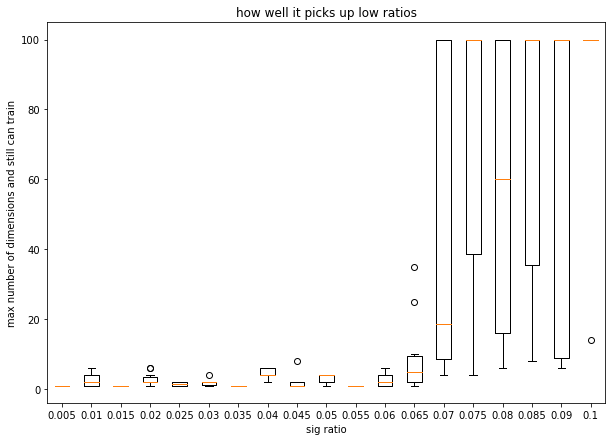

In [15]:
labels = []
data = []
for x, y in numbers_S.items():
    data.append(y)
    labels.append(x)
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data)
 
      
# x-axis labels
ax.set_xticklabels(labels)
 
# Adding title
ax.set_title('how well it picks up low ratios')
ax.set_xlabel('sig ratio')

ax.set_ylabel('max number of dimensions and still can train')
 
     
# show plot
plt.show()